# Proyecto de identificación de colas de ballena

### Integrantes:
- Juan Camilo Zuluaga Monares
- Juan Fernando Dederlé
- Cristian Camilo Henao Rojas
- Mateo Montoya Villegas
- Samuel Ignacio Zapata Valencia

## Motivación

Además de ser los animales más grandes del planeta, las ballenas cumplen un papel fundamental en el equilibrio de los ecosistemas marinos. Los científicos afirman que cuando las ballenas se alimentan a grandes profundidades y vuelven luego a la superficie a respirar, alteran la columna de agua, lo que permite expandir nutrientes y microorganismos. Además, el hierro y nitrógeno de su orina y excremento sirven como fertilizante para el plancton. Por lo tanto, contrario al pensamiento popular que suele tenerse en la industria pesquera, existe evidencia de que la presencia de estos mamíferos significa un incremento, también en la población de peces, como se menciona en un artículo publicado por Brian Clark Howard en 2014 [Howard., B, (2014), More big whales in ocean could mean more more fish, scientist find.]

Como si fuera poco, en una entrevista realizada a Susana Caballero, una investigadora de la Universidad de los Andes, quien llama a estos gigantes animales como bosques de los océanos, se menciona la increíble capacidad que tienen estos mamíferos para acumular dióxido de carbono en sus cuerpos, cumpliendo así un importante servicio al ecosistema terrestre. 

La presencia de ballenas trae consigo también importantes beneficios económicos. El avistamiento de estas majestuosas criaturas se ha convertido en una apetecida actividad internacional en los últimos años, trayendo consigo un importante desarrollo económico de las zonas costeras que frecuentan estos animales.


![Whale](https://media.giphy.com/media/ihMRYa5ULUGOJsLntS/giphy.gif "chess")

## Problemática General

A pesar de los esfuerzos realizados en los últimos años para frenar la disminución de la población de ballenas en el planeta, aún hoy en día estos mamíferos han tenido algunas dificultades adaptándose al acelerado cambio climático que estamos presenciado actualmente. Pero son los constantes conflictos que tienen estos animales con la industria pesquera mundial, la cual asegura que son estos animales los responsables de la disminución en la cantidad de peces en el océano, la mayor preocupación actualmente.

En las últimas décadas se ha realizado un seguimiento de las rutas de migración de las diferentes especies de ballena a partir de la identificación de patrones en la cola de los individuos fotografiados. Sin embargo, este seguimiento ha sido realizado de una forma artesanal, pues es una persona quien se encarga de realizar el trabajo de identificación y clasificación.


## Objetivo
Se pretende construir un algoritmo que permita identificar la presencia de colas de ballena a través del análisis de imagen. Esta herramienta tiene como objetivo agilizar el proceso de identificación y clasificación de ejemplares alrededor del mundo para incrementar el tiempo que es destinado al estudio del comportamiento y planificación de estrategias de conservación.

![Whale1](https://media.giphy.com/media/39KzuJXoCw05G/giphy.gif "whale")

## Trabajos Previos

Se han adelantado algunos estudios para la automatización del proceso de identificación de ballenas procesando imágenes de la cola de estos animales. Entre octubre de 2018 y febrero de 2019 tuvo lugar, inclusive, una competencia en la plataforma Kaggle con el objetivo mencionado inicialmente, a la cual se presentaron más de 2100 equipos. Por lo tanto, existe una base para el desarrollo de nuestro proyecto.


## Problema Específico
El proceso de identificación y clasificación de ballenas a partir de imágenes ha sido desarrollado principalmente de manera manual hasta la fecha, debido a esto es un procedimiento poco eficaz, debido a la cantidad de tiempo que debe emplear una persona para culminarlo. 
Los dos procesos mencionados inicialmente, identificación y clasificación, se fundamentan en el reconocimiento de patrones de color, forma, textura, entre otros. Por lo tanto, se propone desarrollar un algoritmo que permita agilizar este procedimiento y lograr un mejor rendimiento para el proceso de análisis.

La organización [Happy whale](happywhale.com) es una de las más grandes en estos temas, en su página web podemos ver que ellos tienen multiples estadisticas y tienen agrupadas ballenas con sus recorridos desde hace muchos años, anteriormente para agrupar estas fotos, debían hacerlo manualmente observando la nueva foto que les enviaron, y comparandola con el resto de imagenes, ellos auspiciaron una competencia en Kaggle con la intención de automatizar este proceso.

Acá vemos unos datos de una de las ballenas, 15 veces la han visto (ó ha sido fotografiada), y además abajo podemos ver en que coordenadas ha sido vista y cual es su recorrido.
![Ballena en Happy whale](whale/whale1.png)
![Recorrido de la ballena](whale/whale1Recor.png)

# Contribuciones
Se obtiene un algoritmo que puede identificar si en la imagen hay presencia o no de una cola de ballena, clasificando las imágenes en dos categorías Whale y No-Whale.

Esto podría ayudar a aumentar el dataset de la página, haciendo una busqueda en internet (en otros datasets), donde encuentren fotografías de colas ballenas que puedan corresponder a fotos de las ballenas que ellos han visto y nuevas ballenas
![Reconocimiento](whale/recog1.png)
![Reconocimiento](whale/recog2.png)

### Liberías

In [58]:
#Para este proyecto se utilizó tensorflow 2.0
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

### Ubicación del dataset

In [59]:
TRAIN_FOLDER = './whale/train/'
VAL_FOLDER = './whale/valid/'

### Formato de las imágenes que se adjuntarán


In [60]:
#Para el entrenamiento las imágenes se tomarán normalizadas
#Se agrega un data-aumentation de cambio de ángulo, zoom y orientación de las imágenes con el fin
# aumentar el número de muestras.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

#Para la validación, solo se normalizarán las imágenes
val_datagen = ImageDataGenerator(
    rescale=1./255
)

### Formato de los datos para el entrenamiento y validación

In [61]:
# Indicamos como tomaremos los datos.
# El tamaño que tendrán las imagenes
# El tipo de espacio de color que usaremos
# Para aprender con mas fiabilidad no actualizaremos la red con un unico ejemplo
# Usaremos batch_size para coger N ejemplos y promediar la corrección.
train_generator = train_datagen.flow_from_directory(
    directory=TRAIN_FOLDER,
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=25,
    class_mode="binary",
    shuffle=True,
    seed=1
)

# Mostramos los labels que luego nos seran interesantes para saber si perro corresponde a la probabilidad =1 o =0.
# Recordemos que estamos aprendiendo un discriminador entre cola de ballena o no.
#Lo que implica que P(no_ballena) = 1 - P(Ballena)
print('Labels:', dict([(i, k) for i, k in enumerate(train_generator.class_indices)]))

val_generator = val_datagen.flow_from_directory(
    directory=VAL_FOLDER,
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=25,
    class_mode="binary",
    shuffle=True,
    seed=1
)

Found 31243 images belonging to 2 classes.
Labels: {0: 'no_whale_tail', 1: 'whale_tail'}
Found 15156 images belonging to 2 classes.


## Generación del modelo

### Librerías

In [62]:
# Cargamos la clase para generar modelos sequenciales
from keras.models import Sequential 
# Cargamos las siguientes capas
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

### Bloques del modelo

Bloque 1.
Define un modelo de manera secuencial.
Se define el tamaño de las imágenes de entrada preestablecido anteriormente y además recibe imágenes de tres canales (32,32,3).
1. Convolución bidimensional con 128 neuronas o filtros de salida. El kernel de la convolución es de 3x3. Con un paso de (1,1). Se utiliza una activacion rectificada lineal unitaria (ReLU).
2. Convolución bidimensional con 256 neuronas o filtros de salida. El kernel de la convolución es de 3x3. Con un paso de (1,1). Se utiliza una activacion rectificada lineal unitaria (ReLU).
3. Se implementa un Max Pooling para disminutir el tamaño de los datos

In [63]:
model = Sequential()

model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(3, strides=(2, 2)))

Bloque 2.
1. Convolución bidimensional con 128 neuronas o filtros de salida. El kernel de la convolución es de 3x3. Con un paso de (1,1). Se utiliza una activacion rectificada lineal unitaria (ReLU).
2. Convolución bidimensional con 64 neuronas o filtros de salida. El kernel de la convolución es de 3x3. Con un paso de (1,1). Se utiliza una activacion rectificada lineal unitaria (ReLU).
3. Se implementa un Max Pooling para disminutir el tamaño de los datos

In [64]:
model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(3, strides=(2, 2)))

Bloque 3.
1. Convierte la matriz de 3 dimensiones en un vector columna.
2. Operación de activación con 64 neuronas o filtros de salida. Se utiliza una activacion rectificada lineal unitaria (ReLU).
3. Operación de activación con 1 neurona de salida. Se utiliza una activacion sigmoidea para representar la probabilidad de 1 o de 0.

In [65]:
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Optimización del modelo con Adam y compilación del modelo

In [66]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 256)       295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 128)       295040    
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 64)          73792     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)             

In [67]:
# Usamos fit generator para aprender.
# Se definen epocas e iteraciones/epoca
# Indicamos que datos usaremos para validar el correcto aprendizaje y diagnostico
history = model.fit_generator(
        train_generator,
        steps_per_epoch=800,
        epochs=50,
        validation_data=val_generator,
        validation_steps=200)

# Guardamos el modelo
model_json = model.to_json()
with open('model.json', 'w') as json_file:
	json_file.write(model_json)

model.save_weights('model.h5')
print("Guardado con exito.")

Epoch 1/50
800/800 [==============================] - 692s 865ms/step - loss: 0.1608 - binary_accuracy: 0.9333 - val_loss: 0.0807 - val_binary_accuracy: 0.9594
Epoch 2/50
800/800 [==============================] - 646s 808ms/step - loss: 0.1016 - binary_accuracy: 0.9611 - val_loss: 0.0068 - val_binary_accuracy: 0.9766
Epoch 3/50
800/800 [==============================] - 631s 788ms/step - loss: 0.0864 - binary_accuracy: 0.9690 - val_loss: 0.1776 - val_binary_accuracy: 0.9776
Epoch 4/50
800/800 [==============================] - 628s 785ms/step - loss: 0.0714 - binary_accuracy: 0.9733 - val_loss: 0.0123 - val_binary_accuracy: 0.9805
Epoch 5/50
800/800 [==============================] - 609s 762ms/step - loss: 0.0685 - binary_accuracy: 0.9744 - val_loss: 0.1420 - val_binary_accuracy: 0.9842
Epoch 6/50
800/800 [==============================] - 615s 769ms/step - loss: 0.0587 - binary_accuracy: 0.9778 - val_loss: 0.0125 - val_binary_accuracy: 0.9844
Epoch 7/50
800/800 [====================

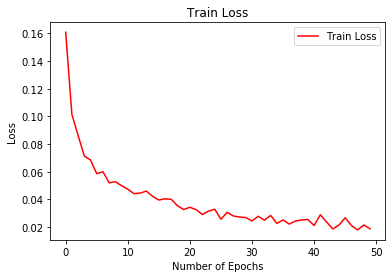

In [68]:
# Plotear curva de Pérdidas vs Épocas durante el entrenamiento
plt.plot(history.history['loss'], color='r', label="Train Loss")
plt.title("Train Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

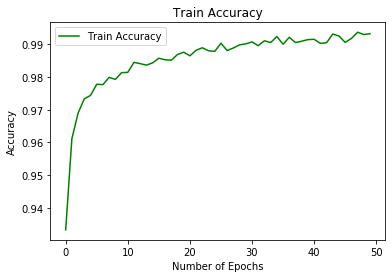

In [69]:
# Plotear curva de Precisión vs Épocas durante el entrenamiento
plt.plot(history.history['binary_accuracy'], color='g', label="Train Accuracy")
plt.title("Train Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Utilizar la red neuronal

### Librerías

In [70]:
import keras, cv2
from keras.models import model_from_json
from keras.preprocessing.image import ImageDataGenerator

### Cargar el modelo entrenado

In [71]:
#El modelo se encuentra en el archivo model.json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
#Luego de cargar el modelo, se le cargan los pesos que se obtuvieron en el entrenamiento
model.load_weights("model.h5")

### Impementar el modelo

#### Cómo probarlo: 
Debe haber existir el siguiente path /whale/test/imagen y en esta carpeta imagen debe una única foto, se deberá cambiar el nombre de la imagen en la variable 'dire' al final de el siguiente segmento de bloque


Interpretar el resultado
La red entrega un porcentaje donde 100% es cola de ballena y 0% es que la imagen no es una cola de ballena
Found 1 images belonging to 1 classes.


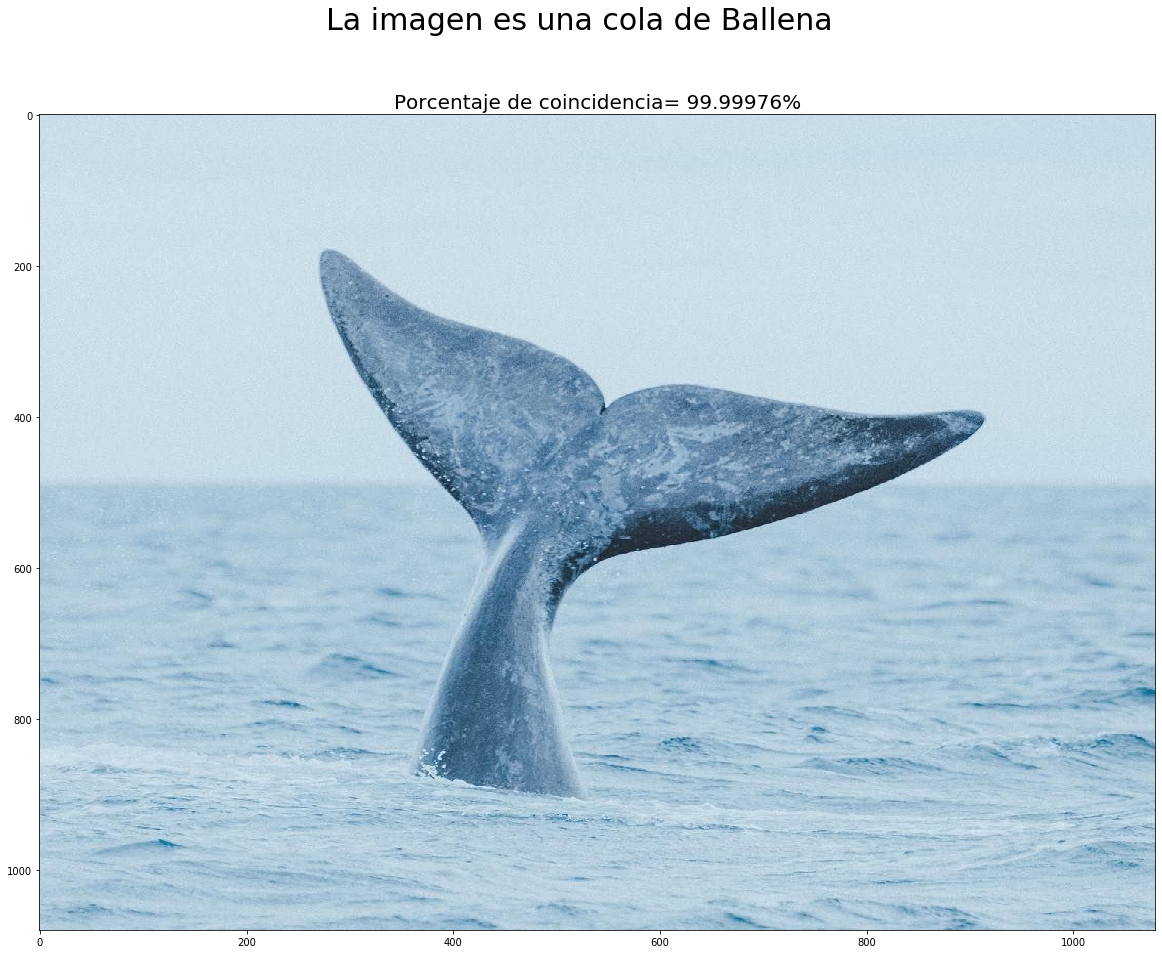

In [141]:
#Obtener imagen para test
TEST_FOLDER='./whale/test/'

print('')
print('Interpretar el resultado')
print('La red entrega un porcentaje donde 100% es cola de ballena y 0% es que la imagen no es una cola de ballena')

#Organizar imagen para introducir al modelo
test_datagen = ImageDataGenerator(
    rescale=1./255,
)

test_generator = test_datagen.flow_from_directory(
    directory=TEST_FOLDER,
     target_size=(32, 32),
    color_mode="rgb",
     class_mode="binary",
)


#Obtención de resultados
raw_results = model.predict(test_generator)
labels = {0: ' ', 1: ' no '}

text="Ballena"

#Comparación de porcentajes
#La red entrega un porcentaje donde 100% es cola de ballena y 0% es que la imagen no es una cola de ballena   

def predict(img,i):
    
    if(raw_results[i][0] < 0.5): # Revisar en el Labels de training
        text=labels[1]      
    else:
        text=labels[0]

    tail=str(text)
    coincidence_percent=str(round(raw_results[i][0]*100,5))

    

    fig, (ax1) = plt.subplots(1,1, figsize=(20, 15))
    fig.suptitle('La imagen'+tail+'es una cola de Ballena', fontsize=30)
    ax1.set_title(('Porcentaje de coincidencia= '+coincidence_percent+'%'), fontsize=20)
    ax1.imshow(img, cmap='Reds', aspect='auto')


#Para utilizar una imagen diferente, cambiar solo el nombre de la imagen, en la siguiente
#línea y colocarla en esa dirección.
dire = 'whale/test/imagen/17.jpg'
img = cv2.cvtColor(cv2.imread(dire), cv2.COLOR_BGR2RGB)
predict(img,0)
    



## Resultados finales:
### Colas de ballena:
Calcularemos con nuestra carpeta Valid/Whail, cuantas colas de ballena logra identificar dentro de este dataset que contiene 10.549 fotos de colas de ballena que no fueron usadas en el entrenamiento.
Para este procedimiento debimos hacer una pequeña modificación en nuestro y fue mover a otro sitio temporal la carpeta no_whail_tail.

In [138]:
#Obtener imagen para test
TEST_FOLDER='./whale/valid/'

#Organizar imagen para introducir al modelo
test_datagen = ImageDataGenerator(
    rescale=1./255,
)

test_generator = test_datagen.flow_from_directory(
    directory=TEST_FOLDER,
     target_size=(32, 32),
    color_mode="rgb",
     class_mode="binary",
)

raw_results = model.predict(test_generator)
print(raw_results)

Found 10549 images belonging to 1 classes.
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [139]:
whail = raw_results[raw_results >= 0.5]
no_whail = raw_results[raw_results < 0.5]
print('Cantidad de colas leídas:',raw_results.shape[0])
print('Cantidad de colas identificadas correctamente: ',whail.shape[0])
print('Cantidad de colas identificadas erroneamente: ',no_whail.shape[0])
print('Porcentaje de error en la identificación de las colas:', round((whail.shape[0]/raw_results.shape[0])*100,5),'%')

Cantidad de colas leídas: 10549
Cantidad de colas identificadas correctamente:  10513
Cantidad de colas identificadas erroneamente:  36
Porcentaje de error en la identificación de las colas: 99.65874 %


### ¿Que imagen falla?
Aquellas imagenes donde la cola de la ballena esté ocluida por algún otro elemento de la foto podrá darle problemas.
![Cola ficti](whale/errorRecor.png)

### Imagenes que no contenían colas de ballena.
En nuestro caso no contamos con un dataset lo suficientemente variado que fueran diferentes a colas de ballena, por tanto presenta el problema de que algunas de las imagenes que nunca se le enseñaron las relaciona con colas de ballena en un alto porcentaje, creemos en que con un dataset más grande y más variado esto representaría un problema menor.
Para este caso usamos un dataset que contenía: Paisajes, perros, gatos, frutas y flores

In [136]:
#Obtener imagen para test
TEST_FOLDER='./whale/valid/'

#Organizar imagen para introducir al modelo
test_datagen = ImageDataGenerator(
    rescale=1./255,
)

test_generator = test_datagen.flow_from_directory(
    directory=TEST_FOLDER,
     target_size=(32, 32),
    color_mode="rgb",
     class_mode="binary",
)

raw_results = model.predict(test_generator)
print(raw_results)

Found 4607 images belonging to 1 classes.
[[1.1850870e-07]
 [1.0814534e-08]
 [9.6194126e-21]
 ...
 [5.2385280e-05]
 [4.3020173e-14]
 [3.6059006e-04]]


In [137]:
whail = raw_results[raw_results >= 0.5]
no_whail = raw_results[raw_results < 0.5]
print('Cantidad de imagenes sin colas leídas:',raw_results.shape[0])
print('Cantidad de "colas" identificadas erroneamente: ',whail.shape[0])
print('Cantidad de imagenes clasificadas correctamente: ',no_whail.shape[0])
print('Porcentaje de error en la identificación de las imagenes sin colas:', round((no_whail.shape[0]/raw_results.shape[0])*100,5),'%')

Cantidad de imagenes sin colas leídas: 4607
Cantidad de "colas" identificadas erroneamente:  53
Cantidad de imagenes clasificadas correctamente:  4554
Porcentaje de error en la identificación de las imagenes sin colas: 98.84958 %


#### Figuras similares:
Probamos con figuras que fueran similares a una cola de ballena, para ver que tan acertado era nuestro modelo, y los resultados fueron bastante gratos.
El dataset del modelo no contenía peces, ni colas de peces.
#### Pez martillo:
La figura de la cabeza podría verse similar a la de una cola de ballena, además el dataset de no_whail no contenía imagenes imagenes dentro del mar, entonces queríamos ver cual era su respuesta.
![Pez martillo](whale/martillo.png)

#### Pez:
Al faltarle imagenes relacionadas con el mar (El dataset de botes, en su mayoría las fotos eran en puertos) y además viendo la similitud de una cola de ballena con la cola de algunos peces, decidimos probar y obtuvimos el siguiente resultado:
![pez](whale/recog2.png)
#### No reales:
La siguiente imagen corresponde a la cola de una sirena.
![sirena](whale/sirena.png)
#### Cola de ballena no real
Quisimos probar que sucedía si veía una cola de ballena en condiciones "no naturales", en este caso particular con un modelo menos entrenado, se llegó a identificar cómo una cola real.
![Cola de metal](whale/colametal.png)
#### Identificación de colas donde no hay.
Pensamos que al no tener un dataset mayor que contuviera fotos diferentes, puede suceder errores cómo el siguiente, donde en su tonalidad se logra ver que es principalmente el color azul.

![Cola ficti](whale/colano.png)